In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Download NLTK data (run this once)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')


In [3]:
# Create sample dataset if CSV doesn't exist
# Fix the file path for reading CSV
try:
    df = pd.read_csv('C:\\Users\\krush\\Downloads\\codetech_ml\\codetech task-2\\customer_reviews.csv')
except FileNotFoundError:
    print("Error: Could not find the customer_reviews.csv file")
    exit()

In [4]:
# Display first few rows of the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Shape:", df.shape)

Dataset Preview:
                                              review  sentiment
0  This product exceeded my expectations. The qua...          1
1  Worst purchase ever. Complete waste of money a...          0
2  Really happy with my purchase. Great value for...          1
3  The product arrived damaged and customer servi...          0
4  Absolutely love this! Would definitely recomme...          1

Dataset Shape: (5, 2)


In [5]:
# Text preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
print("\nPreprocessing text...")
df['processed_review'] = df['review'].apply(preprocess_text)



Preprocessing text...


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_review'], 
    df['sentiment'], 
    test_size=0.2, 
    random_state=42
)


In [7]:
# TF-IDF Vectorization
print("\nVectorizing text...")
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



Vectorizing text...


In [8]:

# Train model
print("\nTraining model...")
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_tfidf, y_train)



Training model...


LogisticRegression(max_iter=1000, random_state=42)

In [9]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [10]:
# Print results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [11]:
# Test the model with a new review
# Improved test section with multiple examples
test_reviews = [
    "The service is excellent and I love it",
    "The service is terrible and I hate it",
    "The product quality is very poor",
    "Amazing customer support and fast delivery",
    "The service is bad and disappointing",
    "This is the best purchase I've made"
]


In [12]:
print("\nMultiple Test Predictions:")
for test_review in test_reviews:
    processed_test = preprocess_text(test_review)
    test_tfidf = tfidf.transform([processed_test])
    prediction = model.predict(test_tfidf)[0]
    probability = model.predict_proba(test_tfidf)[0]
    confidence = probability[1] if prediction == 1 else probability[0]
    
    print(f"\nReview: {test_review}")
    print(f"Sentiment: {'Positive' if prediction == 1 else 'Negative'}")
    print(f"Confidence: {confidence:.2f}")
    print(f"Full Probabilities - Negative: {probability[0]:.2f}, Positive: {probability[1]:.2f}")



Multiple Test Predictions:

Review: The service is excellent and I love it
Sentiment: Positive
Confidence: 0.73
Full Probabilities - Negative: 0.27, Positive: 0.73

Review: The service is terrible and I hate it
Sentiment: Positive
Confidence: 0.71
Full Probabilities - Negative: 0.29, Positive: 0.71

Review: The product quality is very poor
Sentiment: Positive
Confidence: 0.76
Full Probabilities - Negative: 0.24, Positive: 0.76

Review: Amazing customer support and fast delivery
Sentiment: Positive
Confidence: 0.71
Full Probabilities - Negative: 0.29, Positive: 0.71

Review: The service is bad and disappointing
Sentiment: Positive
Confidence: 0.71
Full Probabilities - Negative: 0.29, Positive: 0.71

Review: This is the best purchase I've made
Sentiment: Positive
Confidence: 0.77
Full Probabilities - Negative: 0.23, Positive: 0.77


In [14]:
# Print model performance metrics
print("\nModel Performance on Test Set:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))




Model Performance on Test Set:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



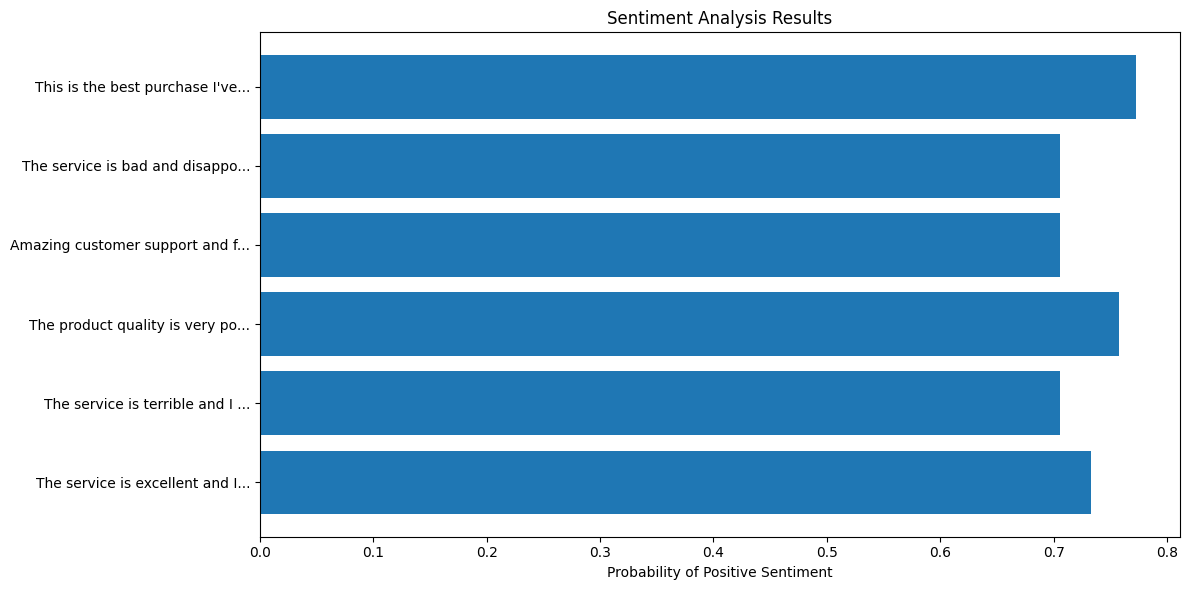

In [13]:
# Visualize the results
plt.figure(figsize=(12, 6))
probabilities = [model.predict_proba(tfidf.transform([preprocess_text(review)]))[0][1] for review in test_reviews]
plt.barh(range(len(test_reviews)), probabilities)
plt.yticks(range(len(test_reviews)), [review[:30] + '...' for review in test_reviews])
plt.xlabel('Probability of Positive Sentiment')
plt.title('Sentiment Analysis Results')
plt.tight_layout()
plt.show()

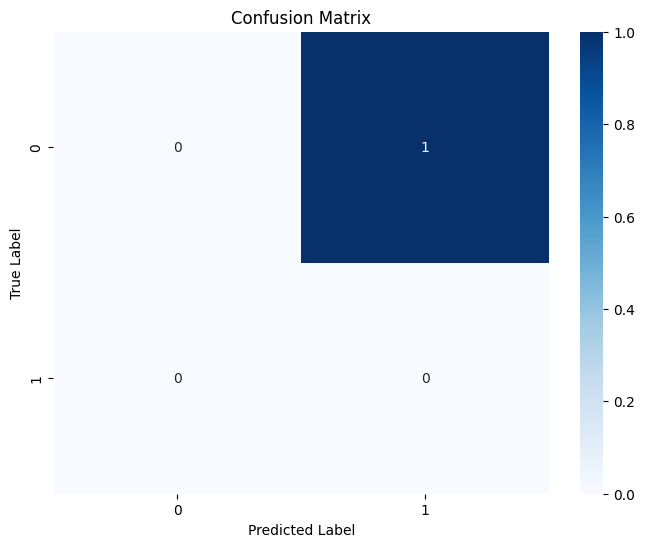

In [15]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()